In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [3]:
# peeking at the dataset
df = pd.read_csv("mcdonalds_data.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
# finding the shape
df.shape

(1453, 15)

In [5]:

# checking for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
# getting the value counts of 'Like'
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [9]:

# getting the value counts of 'Age'
df['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [7]:

# getting the value counts of 'VisitFrequency'
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [10]:

# getting the value counts of 'Gender'
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

     Age
Age  1.0


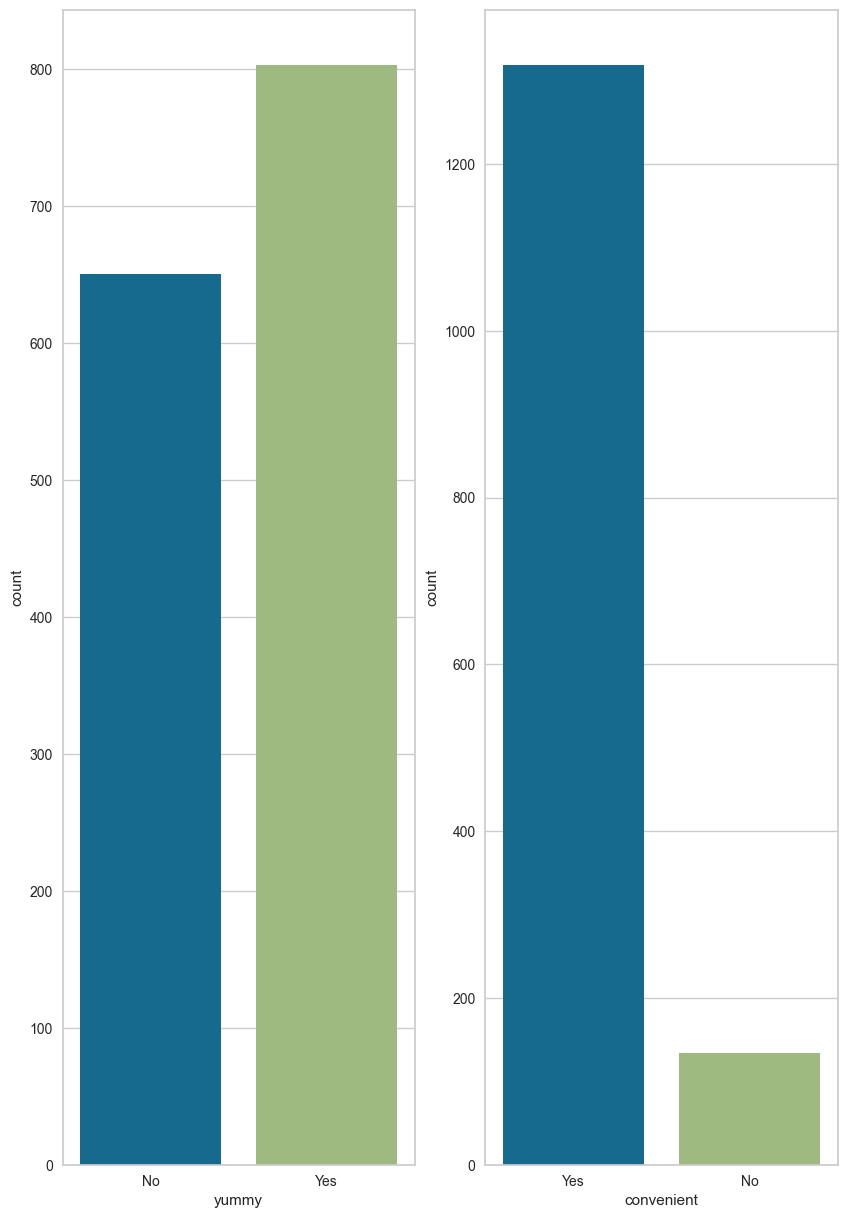

In [11]:
import seaborn as sns
import warnings

def EDA(df, figsize):
    warnings.filterwarnings("ignore")
    cat = [i for i in df.columns if df[i].dtype == 'object']
    con = [i for i in df.columns if df[i].dtype != 'object']
    fig, axs = plt.subplots(len(con), 2, figsize=figsize)
    for i, ax in enumerate(axs.flatten()):
        if i < len(cat):
            sns.countplot(x=cat[i], data=df, ax=ax)
        else:
            sns.distplot(df[con[i-len(cat)]], ax=ax)
    print(df.corr())

# applying the function on the dataset with a smaller plot size
EDA(df, (10, 15))

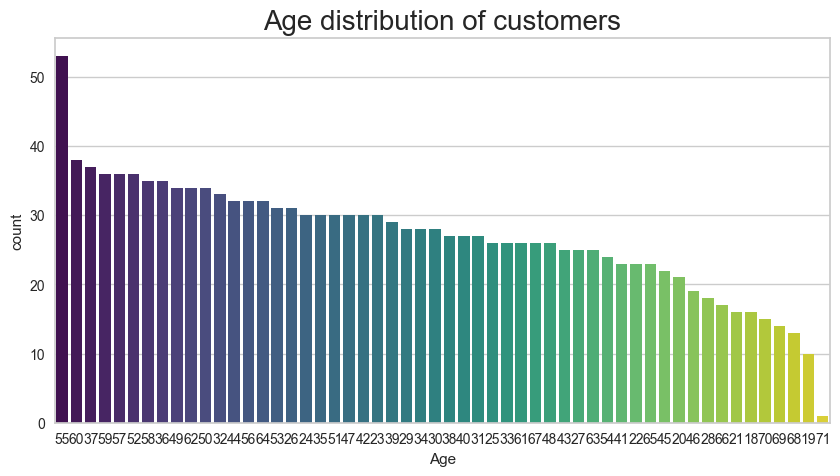

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age: McDonald's receive more customers of age between 50-60 and 35-40
plt.figure(figsize=(10, 5))
sns.countplot(x='Age', data=df, palette='viridis', order=df['Age'].value_counts().index)
plt.title('Age distribution of customers', fontsize=20)
plt.show()

In [20]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [21]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [22]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

# applying scaling and PCA
pc = PCA(n_components=11).fit_transform(preprocessing.scale(df_encoded))
pf = pd.DataFrame(data=pc, columns=['pc{}'.format(i) for i in range(1, PCA().fit(pc).n_components_+1)])
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [24]:
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ # adding to df

# print k-means clustering results
print('Labels:', kmeans.labels_)
print('WCSS:', kmeans.inertia_)
print('No. of iterations: ', kmeans.n_iter_)
print('Cluster centroids: ', kmeans.cluster_centers_)
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558916
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


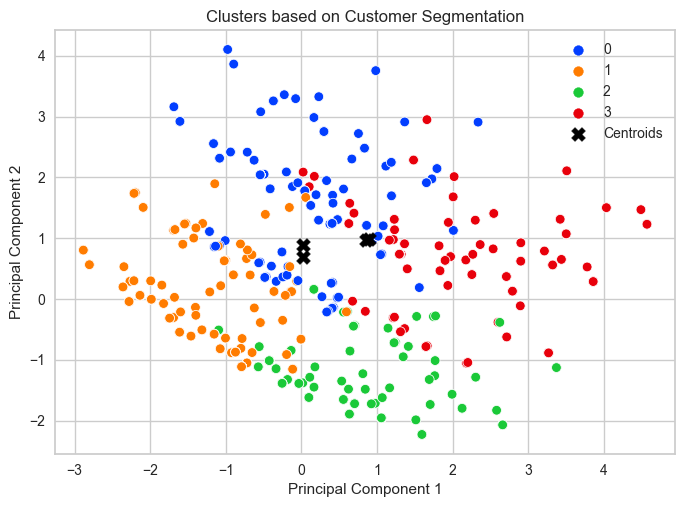

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the plot style
sns.set_style('whitegrid')

# create the scatter plot
sns.scatterplot(data=pf, x='pc1', y='pc2', hue=kmeans.labels_, palette='bright')

# add the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c='black', s=100, label='Centroids')

# add legend and axis labels
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# set the title
plt.title('Clusters based on Customer Segmentation')

# show the plot
plt.show()